## Preproccesing Data (Extracting Data)
### Meteorite Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 15})

# read Meteorite data and sort them by yeras
df_meteorite = pd.read_csv("Meteorite_Landings.csv").sort_values(by=['year'])

# drop rows with NAN value
df_meteorite = df_meteorite.dropna()

# drop unnecessary columns
##### GeoLocation - reclat and reclong exsits
##### nametype & id - not needed
df_meteorite = df_meteorite.drop(columns={'GeoLocation', 'nametype', 'id'})

# Change the format of date MM/DD/YYYY to YYYY
df_meteorite['year'] = df_meteorite['year'].str.slice(6, 10)

print("Number of observations: " + str(df_meteorite.shape[0]))
df_meteorite.head()

Number of observations: 38116


,name,recclass,mass (g),fall,year,reclat,reclong
174,Castrovillari,Stone-uncl,15000.0,Fell,1583,39.80000,16.20000
26166,Morito,"Iron, IIIAB",10100000.0,Found,1600,27.05000,-105.43333
410,Jalandhar,Iron,1967.0,Fell,1621,31.00000,75.00000
956,Stretchleigh,Stone-uncl,10400.0,Fell,1623,50.38333,-3.95000
369,Hatford,Stone-uncl,29000.0,Fell,1628,51.65000,-1.51667


<hr />

### Natural Disaster Data


In [2]:
# Read Natural Disaster data
# ND = Natural Disaster
df_ndisaster = pd.read_csv("natural_disaster.csv")
df_ndisaster.shape

(48390, 16)

In [3]:
# Create new dateframe with only necessary columns
df_ndisaster = pd.DataFrame({'Year':df_ndisaster['Incident Begin Date'],
                   'Incident Type':df_ndisaster['Incident Type'], 
                   'Title':df_ndisaster['Title'],
                   'Declared County':df_ndisaster['Declared County/Area']})

df_ndisaster['Year'] = (pd.to_datetime(df_ndisaster['Year'])).dt.year
# drop any row with NAN value
df_ndisaster = df_ndisaster.dropna()

print("Number of observations: " + str(df_ndisaster.shape[0]))

df_ndisaster.head()

Number of observations: 48193


,Year,Incident Type,Title,Declared County
0,2018,Fire,WILDFIRES,Butte (County)
1,2018,Fire,WILDFIRES,Los Angeles (County)
2,2018,Fire,WILDFIRES,Ventura (County)
3,2018,Fire,WILDFIRES,Butte (County)
4,2018,Fire,WILDFIRES,Los Angeles (County)


### <hr />

## Observing Data

### Observe number of natural disasters occured each year (1959 ~ 2012)

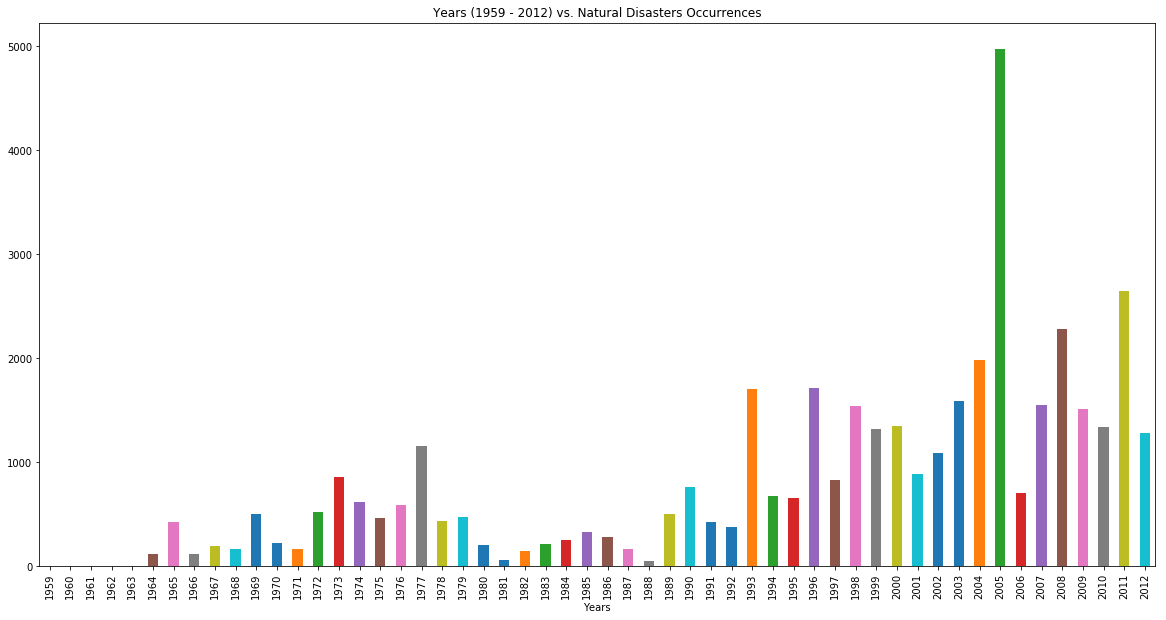

In [4]:
# Sort natural disaster data frame by type of disasters
df_ndisaster = df_ndisaster.sort_values(by=['Year'])

# Count number of disasters occured per year
years = df_ndisaster['Year'].values

minYear = years[0]
maxYear = 2012
years_freq_nd = [0] * (maxYear - minYear + 1)

for x in years:
    if(x>maxYear):
        break
    years_freq_nd[x-minYear] = years_freq_nd[x-minYear] + 1

# 1960, 61, 62,, and 63 doesn't exist in original, 
# so i'm going to create new datafram with these years included
years = []
{years.append(x) for x in range(minYear, maxYear+1)}

df_years_vs_nd = pd.DataFrame({'Years':years, 'Natural Disaster Occurrences':years_freq_nd})
df_years_vs_nd.plot(x='Years', y='Natural Disaster Occurrences', kind='bar', figsize=(20,10),
             title="Years (1959 - 2012) vs. Natural Disasters Occurrences", legend=False)

# df_years_vs_nd

> The above graph shows the year 2005 had far more number of natural disasters compare to any other yeras. [Was 2005 the year of natural disasters?](http://www.who.int/bulletin/volumes/84/1/news10106/en/)

<hr />

### Observe number of meteorite impacts occured each year (1959 ~ 2012)

[Meteorites, Impcats, and Mass Extinction](http://www.tulane.edu/~sanelson/Natural_Disasters/impacts.htm)

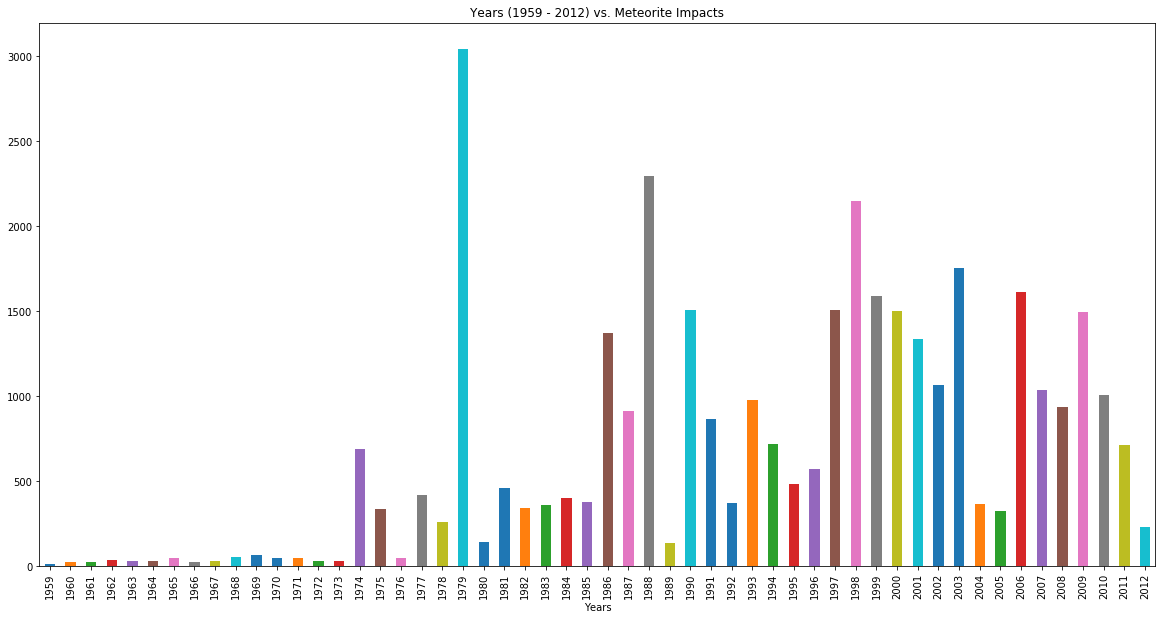

In [5]:
years_freq_meteo = [0] * (maxYear - minYear + 1)

for x in (pd.DataFrame({'Year':df_meteorite['year']})).values:
    if int(x) >= minYear and int(x) <= maxYear:
        years_freq_meteo[int(x)-minYear] = years_freq_meteo[int(x)-minYear] + 1

df_years_vs_meteo = pd.DataFrame({'Years':years, 'Num. of Meteorite Impacts':years_freq_meteo})
df_years_vs_meteo.plot(x='Years', y='Num. of Meteorite Impacts', kind='bar', figsize=(20,10),
             title="Years (1959 - 2012) vs. Meteorite Impacts", legend=False)

## Plot NDO and MIO side by side

NDO : Natural Disaster Occurrences

MIO : Meteroite Impact Occurrences

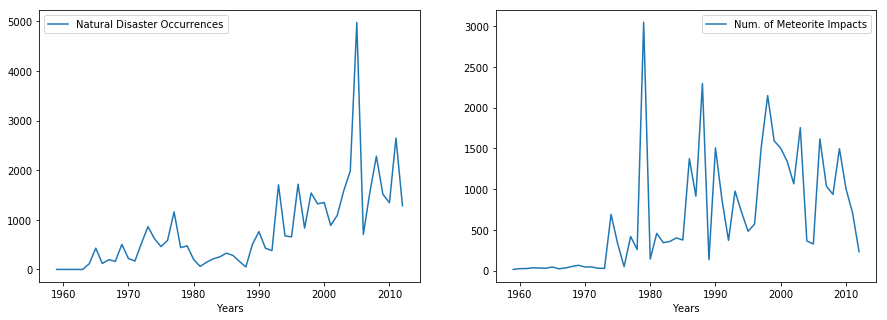

In [6]:
fig, axs = plt.subplots(1,2)

df_years_vs_nd.plot(ax=axs[0], x='Years', y='Natural Disaster Occurrences', kind='line', figsize=(15, 5))
df_years_vs_meteo.plot(ax=axs[1], x='Years', y='Num. of Meteorite Impacts', kind='line', figsize=(15, 5))

# Geographic Plot

In [7]:
ndo = df_years_vs_nd[(df_years_vs_nd['Years'][:] >= 1959) & (df_years_vs_nd['Years'][:] <= 2013)]
# plt.loglog(df_years_vs_nd['Years'], ndo['Natural Disaster Occurence'], '.')

In [8]:
# type cast string year to int
df_meteorite['year'] = df_meteorite['year'].apply(lambda x: int(x))

# grab coulmns whose years are btwn 1959 and 2013
df_m = df_meteorite[(df_meteorite['year'][:] >= 1959) & (df_meteorite['year'][:] <= 2013)]

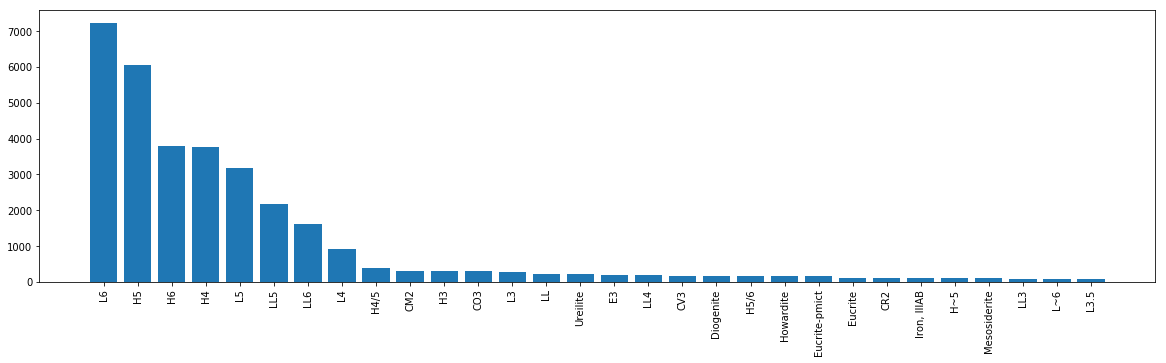

In [9]:
# plot meteorite classification
plt.figure(figsize=(20,5))
plt.bar(df_m['recclass'].value_counts().index[0:30], df_m['recclass'].value_counts().values[0:30])
_ = plt.xticks(rotation=90)

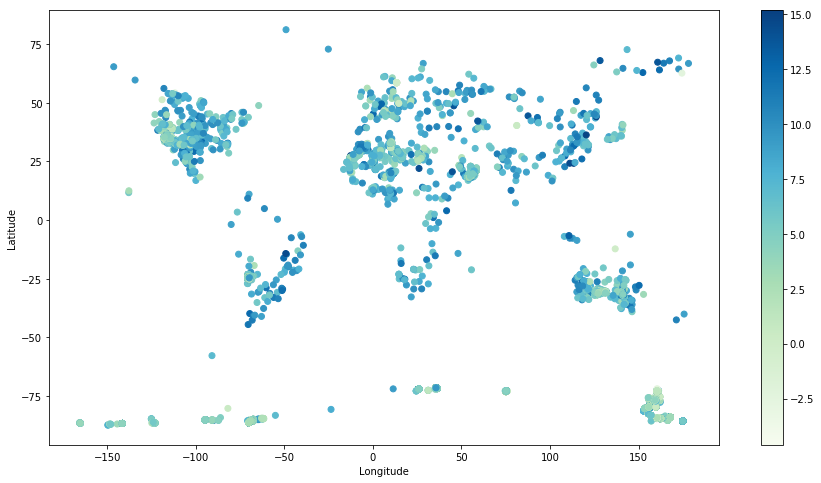

In [10]:
# remove reclong/reclat with value == 0
df_m = df_m[df_m['reclong'] != 0]
df_m = df_m[df_m['reclat'] != 0]
# color_mass = [np.log(mass) for mass in df_m['mass (g)']]

color_mass = []

for mass in df_m['mass (g)']:
    if mass == 0:
        color_mass.append(np.log(1))
    elif mass != 0:
        color_mass.append(np.log(mass))

plt.figure(figsize=(15,8))
plt.scatter(df_m['reclong'], df_m['reclat'],
            c=color_mass, cmap=plt.cm.GnBu)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.title('Geographical Locations of Meteorite Landings by Mass (g)')
plt.show()

In [11]:
# color_mass = [np.log(mass) for mass in df_m['mass (g)']]
# googled - splice region - USA
df_m = df_m[(df_m['reclong']<=-65) & (df_m['reclat']>=28) & (df_m['reclat']<=49)]
color_mass = []

for mass in df_m['mass (g)']:
    if mass == 0:
        color_mass.append(np.log(1))
    elif mass != 0:
        color_mass.append(np.log(mass))

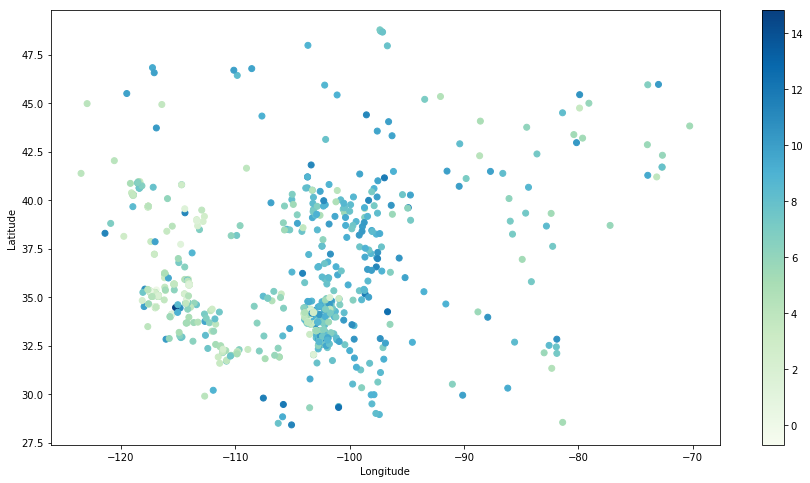

In [12]:
plt.figure(figsize=(15,8))
plt.scatter(df_m['reclong'], df_m['reclat'],
            c=color_mass, cmap=plt.cm.GnBu)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# plt.title('Geographical Locations of Meteorite Landings by Mass (g)')
plt.show()

## Finalized DataFrame

In [13]:
df_final = pd.DataFrame({
        'years':df_years_vs_nd['Years'],
        'ndo':df_years_vs_nd['Natural Disaster Occurrences'],
        'mio':df_years_vs_meteo['Num. of Meteorite Impacts']})

avg_mass = []
max_mass = []
class_name = []
max_count = []

years = range(1959, 2013)
for year in years:
    avg_mass.append(np.mean(df_m['mass (g)'][df_m['year']==year].values))
    max_mass.append(max(df_m['mass (g)'][df_m['year']==year].values))
    max_count.append(df_m.recclass[df_m['year']==year].value_counts()[0])
    class_name.append(df_m.recclass[df_m['year']==year].value_counts().index[0])
    
df_final['class_name'] = pd.DataFrame({'class_name':class_name})
df_final['max_count'] = pd.DataFrame({'max_count':max_count})
df_final['avg_mass'] = pd.DataFrame({'avg_mass':avg_mass})
df_final['max_mass'] = pd.DataFrame({'max_mass':max_mass})

df_final.head()

df_final = df_final[:-1]
# years      -> years 1959~2013
# ndo        -> natural disaster occurence
# mio        -> meteorite impact occurence 
# class_name -> classified name of meteorite with most occurence in that year
# max_count  -> above meteorite's max occurence number
# avg_mass   -> average meteorite mass in that year
# max_mass   -> largest meteorite fell in that year

## Data Simulation

### Fit a Simple Linear Regression: NDO vs. MIO

const    0.000938
mio      0.087315
dtype: float64


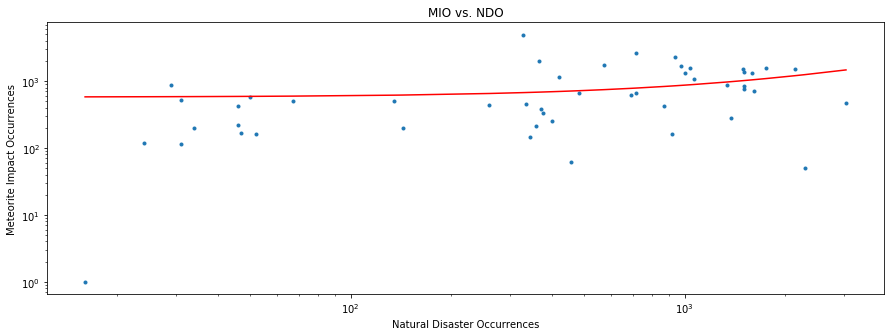

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

def graph(x, y):
    plt.figure(figsize=(15,5))
    plt.loglog(df_final[x], df_final[y], '.')
    return (df_final[x], df_final[y])
    
# scatter plot ndo vs mio
x, y = graph('mio', 'ndo')
plt.xlabel('Natural Disaster Occurrences')
plt.ylabel('Meteorite Impact Occurrences')
plt.title('MIO vs. NDO')

# P-values
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

print(results.pvalues)

# building a model
fit = np.polyfit(x, y, deg=1)
plot_x = x.sort_values(ascending=True)
plt.plot(plot_x, fit[0]*plot_x + fit[1], color='red') #add reg line

plt.show()

### Fit a Simple Linear Regression: NDO vs. Max_Count

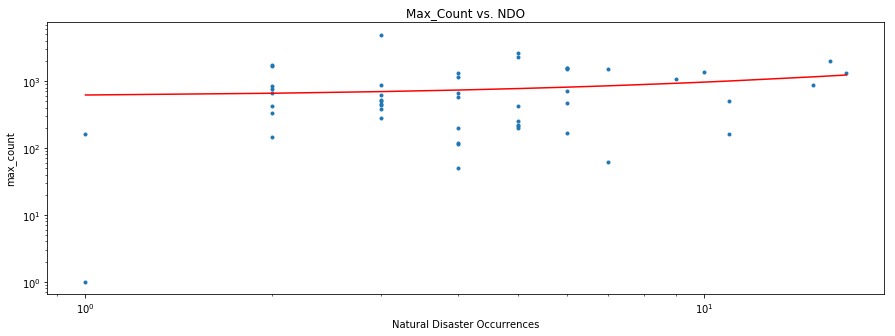

In [15]:
# scatter plot ndo vs max_count
x,y = graph('max_count', 'ndo')
plt.xlabel('Natural Disaster Occurrences')
plt.ylabel('max_count')
plt.title('Max_Count vs. NDO')

# P-values
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

# print(results.pvalues)

# building a model
fit = np.polyfit(x, y, deg=1)
plot_x = x.sort_values(ascending=True)
plt.plot(plot_x, fit[0]*plot_x + fit[1], color='red') # add reg line

plt.show()

### Fit a Simple Linear Regression: NDO vs. Avg_Mass

const       5.810940e-08
avg_mass    2.722923e-01
dtype: float64


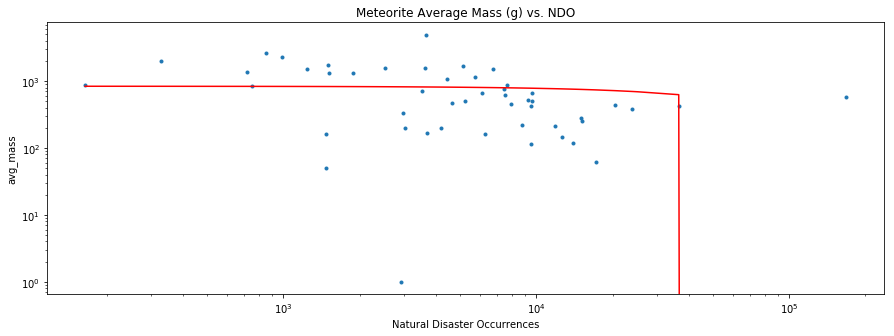

In [16]:
# scatter plot ndo vs avg_mass
x,y = graph('avg_mass', 'ndo')
plt.xlabel('Natural Disaster Occurrences')
plt.ylabel('avg_mass')
plt.title('Meteorite Average Mass (g) vs. NDO')

# P-values
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

print(results.pvalues)

# building a model
fit = np.polyfit(x, y, deg=1)
plot_x = x.sort_values(ascending=True)
plt.plot(plot_x, fit[0]*plot_x + fit[1], color='red') # add reg line

plt.show()

### Fit a Simple Linear Regression: NDO vs. Max_Mass

const       6.023429e-08
max_mass    5.478248e-01
dtype: float64


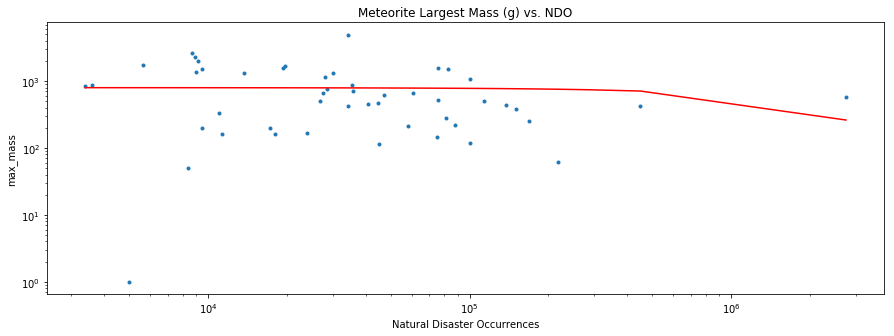

In [17]:
# scatter plot ndo vs max_mass
x,y = graph('max_mass', 'ndo')
plt.xlabel('Natural Disaster Occurrences')
plt.ylabel('max_mass')
plt.title('Meteorite Largest Mass (g) vs. NDO')

# P-values
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

print(results.pvalues)

# building a model
fit = np.polyfit(x, y, deg=1)
plot_x = x.sort_values(ascending=True)
plt.plot(plot_x, fit[0]*plot_x + fit[1], color='red') # add reg line

plt.show()

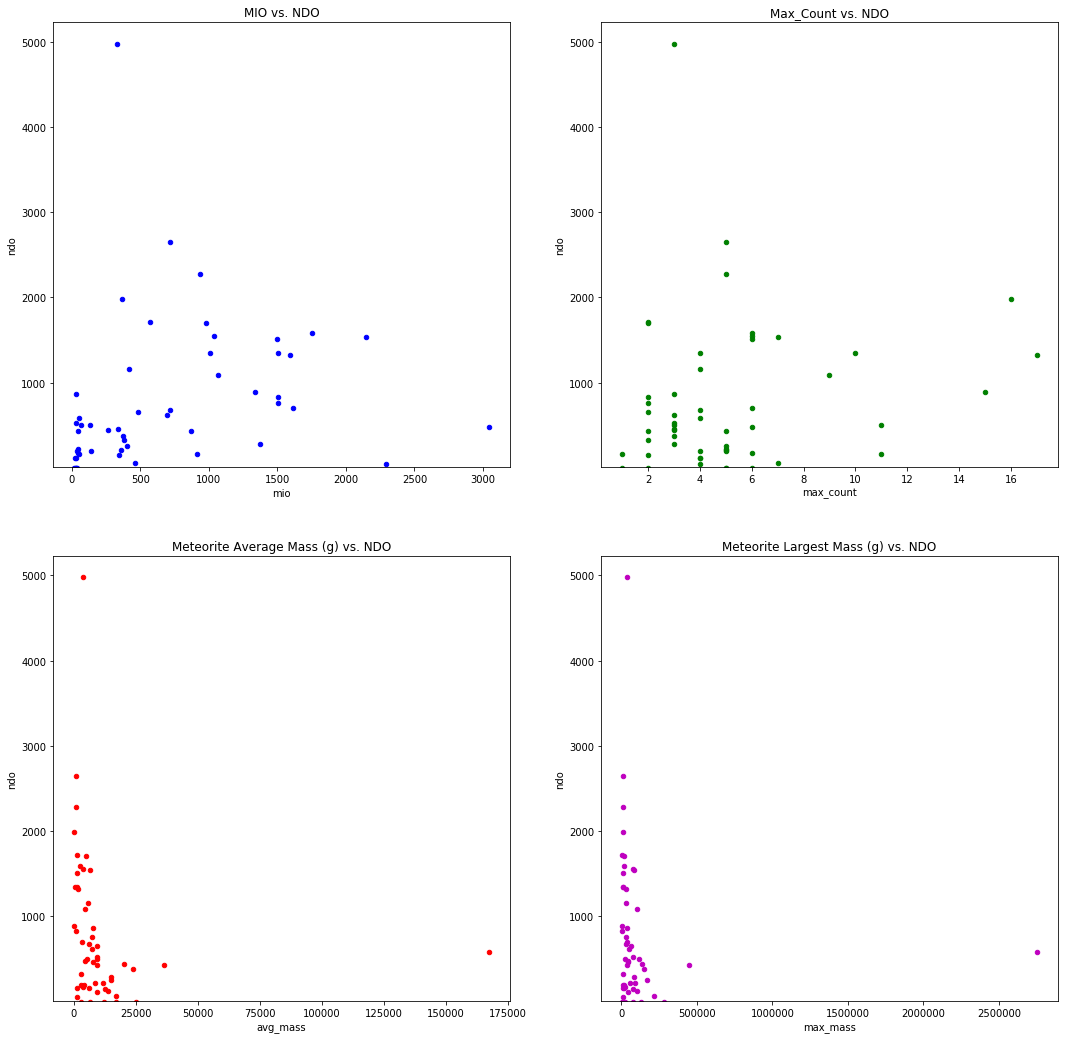

In [18]:
fig, axs = plt.subplots(2,2)

df_final.plot(ax=axs[0][0], x='mio', y='ndo', ylim=10e0, kind='scatter', color='b', title='MIO vs. NDO', figsize=(18,18))
df_final.plot(ax=axs[0][1], x='max_count',y='ndo', ylim=10e0, kind='scatter', color='g', title='Max_Count vs. NDO')
df_final.plot(ax=axs[1][0], x='avg_mass', y='ndo', ylim=10e0, kind='scatter', color='r', title='Meteorite Average Mass (g) vs. NDO')
df_final.plot(ax=axs[1][1], x='max_mass', y='ndo', ylim=10e0, kind='scatter', color='m', title='Meteorite Largest Mass (g) vs. NDO')


## Multiple Linear Regression

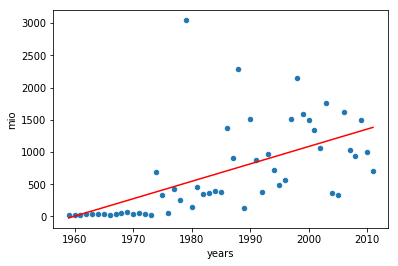

In [19]:
df_final.plot('years', 'mio', kind='scatter')
fit = np.polyfit(df_final['years'], df_final['mio'], deg=1)
# plot_x = x.sort_values(ascending=True)
plt.plot(df_final['years'], fit[0]*df_final['years'] + fit[1], color='red') # add reg line

plt.show()

In [20]:
# multi regression summary
fit = ols('ndo ~ years + mio', data = df_final).fit()
fit.params

Intercept   -92929.618117
years           47.317105
mio             -0.320108
dtype: float64

In [21]:
# multi regression summary
fit = ols('ndo ~ years', data = df_final).fit()
fit.params

Intercept   -75976.220126
years           38.666667
dtype: float64

In [22]:
# multi regression summary
fit = ols('y ~ 1 + mio + max_count:class_name ', data = df_final).fit()
fit.f_pvalue

0.36918604001096955

In [23]:
df_final.columns

Index(['years', 'ndo', 'mio', 'class_name', 'max_count', 'avg_mass',
       'max_mass'],
      dtype='object')

In [24]:
# multi regression summary
fit = ols('ndo ~ 1 + mio + avg_mass + years', data = df_final).fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ndo   R-squared:                       0.511
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     17.09
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           9.93e-08
Time:                        13:12:45   Log-Likelihood:                -414.66
No. Observations:                  53   AIC:                             837.3
Df Residuals:                      49   BIC:                             845.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.254e+04   1.39e+04     -6.634      0.000   -1.21e+05   -6.45e+04
mio           -0.3248      0.155     -2.097      0.041      -0.636      -0.014
avg_mass      -0.0009      0.004     -0.238      0.813      -0.009       0.007
years         47.1262      7.055      6.680      0.000      32.949      61.304
==============================================================================
Omnibus:                       52.425   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              329.620
Skew:                           2.495   Prob(JB):                     2.65e-72
Kurtosis:                      14.152   Cond. No.                     4.08e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.08e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Cross Validation

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# from sklearn import cross_validation as CV
from sklearn import svm
from sklearn.utils import shuffle
from sklearn import datasets, linear_model

from sklearn.svm import SVR

# these two lines of codes works
# reg = SVR(C=1., epsilon=0.1, kernel='linear')
# CV.cross_val_score(reg, df_cv['ndo'].values.reshape(-1,1), df_cv['mio'], cv=3)

df_cv = shuffle(df_final)
# clf = svm.SVC(kernel='linear') # this one doesn't seem to work: bad input error

#scoring: https://scikit-learn.org/stable/modules/model_evaluation.html
clf = linear_model.LinearRegression()
scores = cross_val_score(clf,df_cv['ndo'].values.reshape(-1,1), df_cv['mio'], cv=10)
    
print(np.abs(scores))

[0.01930991 0.15105112 0.01969235 2.16392968 3.00218771 0.1922802
 0.53932502 0.02309722 0.51800445 0.24344372]


In [26]:
scores = cross_val_score(clf,df_cv['ndo'].values.reshape(-1,1), df_cv[['years', 'mio']], cv=10)
print((scores))

[ 0.01950119  0.1511227   0.01989024 -2.16306246 -2.99978416  0.1926167
 -0.53878575 -0.02297754 -0.51691147 -0.24347381]


In [27]:
scores = cross_val_score(clf,df_cv['ndo'].values.reshape(-1,1), df_cv['years'], cv=10)
print(np.abs(scores))

[0.30028192 0.35436827 0.45235433 1.22703446 1.16301089 0.37467806
 0.74147048 0.55262738 0.33835921 0.4764881 ]


## k-fold CV

In [139]:
from sklearn.metrics import confusion_matrix
import statsmodels.formula.api as smf
import math

threshold = 0.05
kf = KFold(n_splits=4, shuffle = True)

df_cv = shuffle(df_final)
train_trrs = []
valid_trrs = []

df_cv = pd.DataFrame({'ndo':df_cv['ndo'], 'mio':df_cv['mio'], 'years':df_cv['years']})

for train_index, test_index in kf.split(df_cv):
    df_train = df_cv.iloc[train_index, :]
    df_valid = df_cv.iloc[test_index, :]
    
    res = smf.ols(formula='ndo ~ years + mio', data=df_train).fit(disp=0)
    train_pred_cat = (res.predict(df_train[['years', 'mio']]) > threshold) * 1
    train_conf_mat = confusion_matrix(df_train.ndo, train_pred_cat)
  
    train_trr = (train_conf_mat[0,1]+train_conf_mat[1,0]) / (train_conf_mat[1,0]+train_conf_mat[0,0]+train_conf_mat[0,1]+train_conf_mat[1,1])
    train_trrs.append(train_trr)
    
    valid_pred_cat = (res.predict(df_valid[['years', 'mio']]) > threshold) * 1
    valid_conf_mat = confusion_matrix(df_valid.ndo, valid_pred_cat)
    
    valid_trr = (valid_conf_mat[0,1]+valid_conf_mat[1,0]) / (valid_conf_mat[1,0]+valid_conf_mat[0,0]+valid_conf_mat[0,1]+valid_conf_mat[1,1])
#     if math.isnan(valid_trr):
#         valid_trr = 0
    valid_trrs.append(valid_trr)

res_table = pd.DataFrame()
res_table['trainning_error_rate'] = train_trrs
res_table['test_error_rate'] = valid_trrs
res_table

,trainning_error_rate,test_error_rate
0,0.250000,0.0
1,0.333333,0.0
2,0.250000,0.0
3,0.000000,1.0


In [141]:
print(res_table.mean(axis=0))
print()
print("The 2 error rates are not close to each other, suggesting there probably is overfitting problem in the model.")

trainning_error_rate    0.208333
test_error_rate         0.250000
dtype: float64

The 2 error rates are not close to each other, suggesting there probably is overfitting problem in the model.


## Bootstrap Resampling

In [144]:
# Resample 500 times
nboot = 100
threshold = 0.5
n_samples = df_final.shape[0]
rboot = []

# bootstrap 
for i in range(0,nboot):
    df_bt = df_final.sample(n = n_samples, replace=True)
    res = smf.ols(formula='ndo ~ years + mio', data=df_bt).fit(disp=0)
    rboot.append(res.params.mio)

mean = np.mean(rboot)
std = np.std(rboot)

print("Mean: %f" % mean)
print("STD: %f" % std)

Mean: -0.361899
STD: 0.249400
